<a href="https://colab.research.google.com/github/Uma1709/Data-Science-Project-Series/blob/main/phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the Structure and Characteristics
Load and Inspect the Data:
Read the dataset into a DataFrame (e.g., using Pandas in Python).
Check the first few rows to understand the structure.
Inspect the data types and missing values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/infolimpioavanzadoTarget.csv")
df.head(10)


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.006903,-0.460000,-2.818628,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740293,-1.300001,-7.394773,0
7,2022-01-12,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.181191,-1.110001,-6.479863,0
8,2022-01-13,16.000000,16.170000,15.680000,15.810000,15.810000,69100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.596204,-1.400001,-8.134808,0
9,2022-01-14,15.700000,15.750000,15.360000,15.590000,15.590000,92900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801553,-1.180000,-7.036376,0


#

In [ ]:

#Display the first few rows
print(df.head())



         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

#Handle Missing Values: Identify and handle missing values appropriately.



In [ ]:

print(df.isnull().sum())
df = df.fillna(method='ffill')

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


<ipython-input-4-077b203d41b5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill as an example


#Data Types: Ensure that data types are correct for each column.



In [ ]:

df['date'] = pd.to_datetime(df['date'])

#EDA:
#Visualization and Trend Analysis:

Time Series Plot: Plot stock prices over time to identify trends and seasonality.



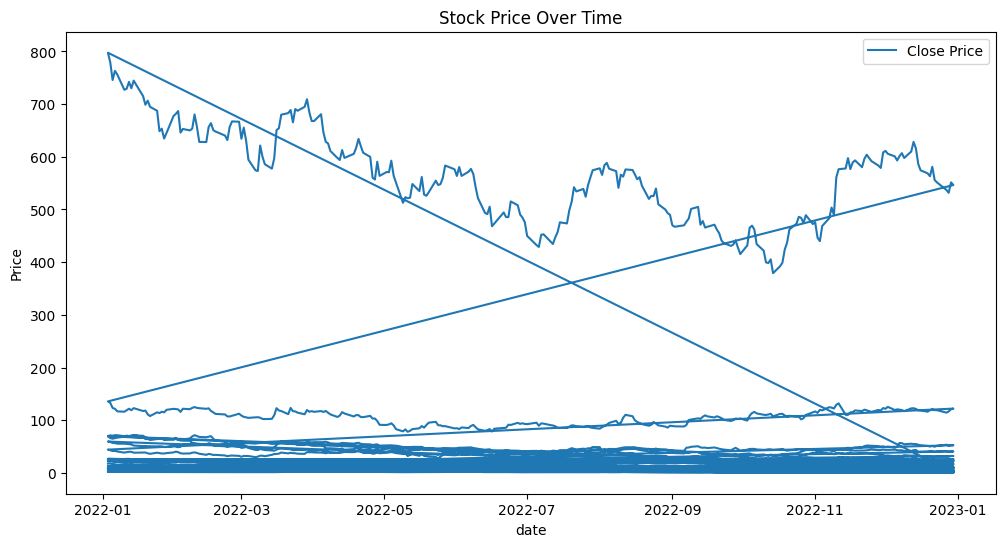

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

#Rolling Statistics:
Plot rolling means and standard deviations to understand volatility.

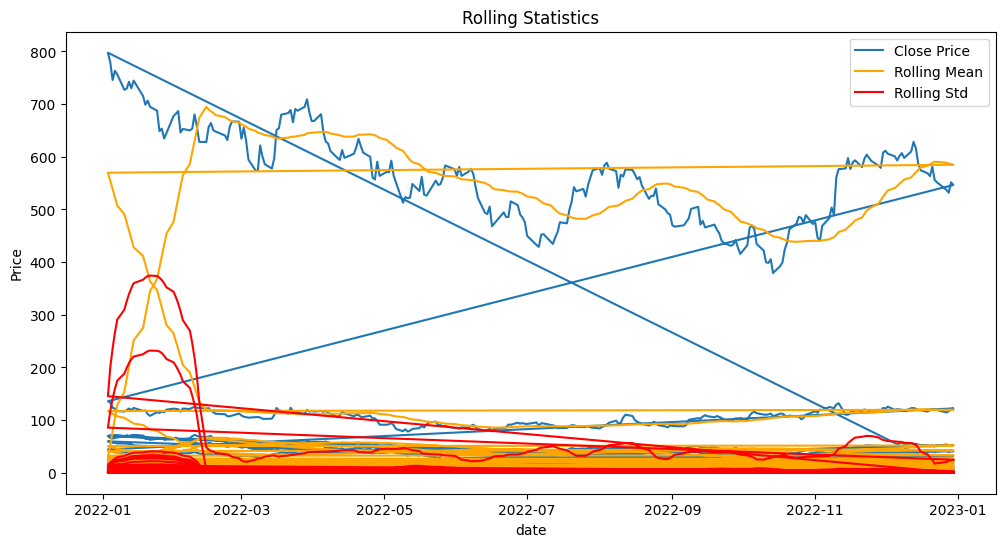

In [ ]:
df['Rolling_Mean'] = df['close'].rolling(window=30).mean()
df['Rolling_Std'] = df['close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['Rolling_Mean'], label='Rolling Mean', color='orange')
plt.plot(df['date'], df['Rolling_Std'], label='Rolling Std', color='red')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Rolling Statistics')
plt.legend()
plt.show()


#Correlation Analysis:
Analyze correlations between different stock features (e.g., Open, High, Low, Volume).

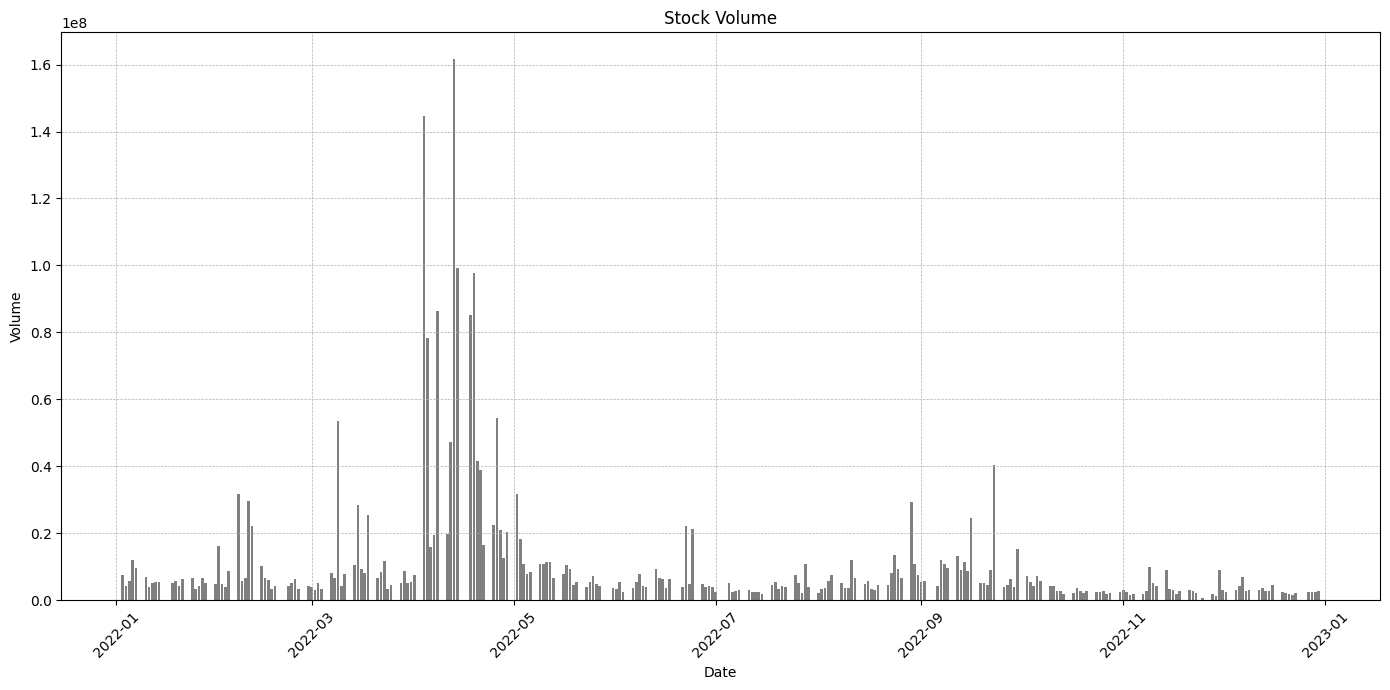

In [ ]:
plt.figure(figsize=(14, 7))
plt.bar(df['date'], df['volume'], color='gray')
plt.title('Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#Predictive Modeling

In [ ]:
# Feature Engineering: Create a moving average
df['MA50'] = df['close'].rolling(window=50).mean()

# Drop rows with missing values (due to moving average)
df.dropna(inplace=True)

# Define features and target
X = df[['open', 'high', 'low', 'volume', 'MA50']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2 Score:', r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 0.7399547454532621
MAE: 0.29158462450714967
R2 Score: 0.999918386388202


In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))


Random Forest Regression:
MSE: 2.968501134267554
MAE: 0.4578558840877883
R2 Score: 0.9996725879512461


In [ ]:
# Reshape the data for LSTM model
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, batch_size=1, epochs=10)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluation
print('LSTM Model:')
print('MSE:', mean_squared_error(y_test, y_pred_lstm))
print('MAE:', mean_absolute_error(y_test, y_pred_lstm))
print('R2 Score:', r2_score(y_test, y_pred_lstm))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 6016.1260
Epoch 2/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 111.3453
Epoch 3/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 75.8659
Epoch 4/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67.1078
Epoch 5/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 68.7488
Epoch 6/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 48.4299
Epoch 7/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 58.3492
Epoch 8/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 58.8560
Epoch 9/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 36.5390
Epoch 10/10
3324/3324 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 47.1288
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
LSTM Model:
MSE: 16.347565461480464
MAE: 1.7066395270551873
R2 Score: 0.9981969385700765


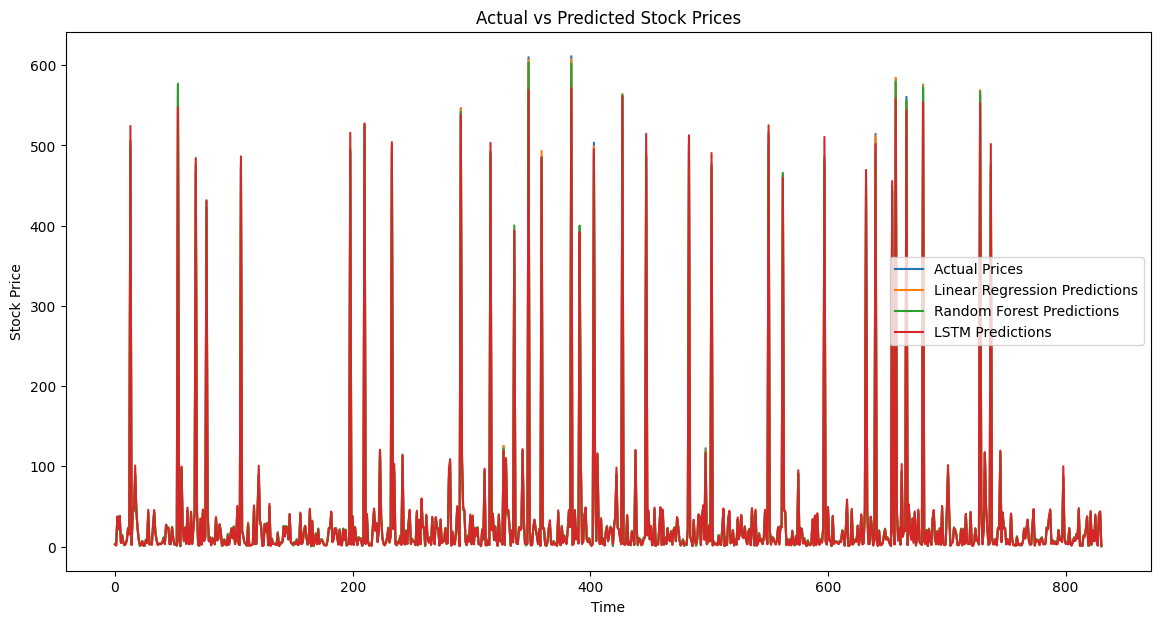

In [ ]:
# Plotting the predicted vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_lr, label='Linear Regression Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.plot(y_pred_lstm, label='LSTM Predictions')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#Project 2  Breast cancer prediction

In [ ]:

import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Mondel performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics


#warnings
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
import pandas as pd
df = pd.read_csv('/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
nRow, nCol= df.shape
print(f'There are {nRow} rows and {nCol} columns')

# lists name of columns
df.columns

There are 569 rows and 33 columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# categorical and numerical features
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : id radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst Unnamed: 32


In [ ]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#Exploratory Data Analysis (EDA)

In [ ]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

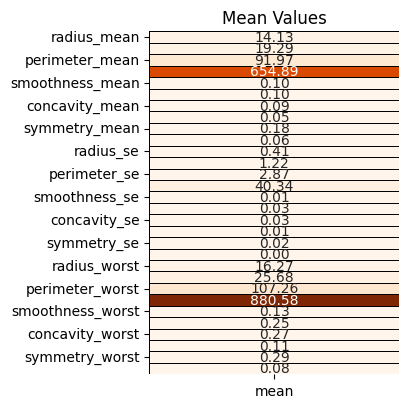

In [ ]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
#mean value
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(df.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

In [ ]:
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [ ]:
df["diagnosis"].value_counts()

# 1 : M and 0 : B
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

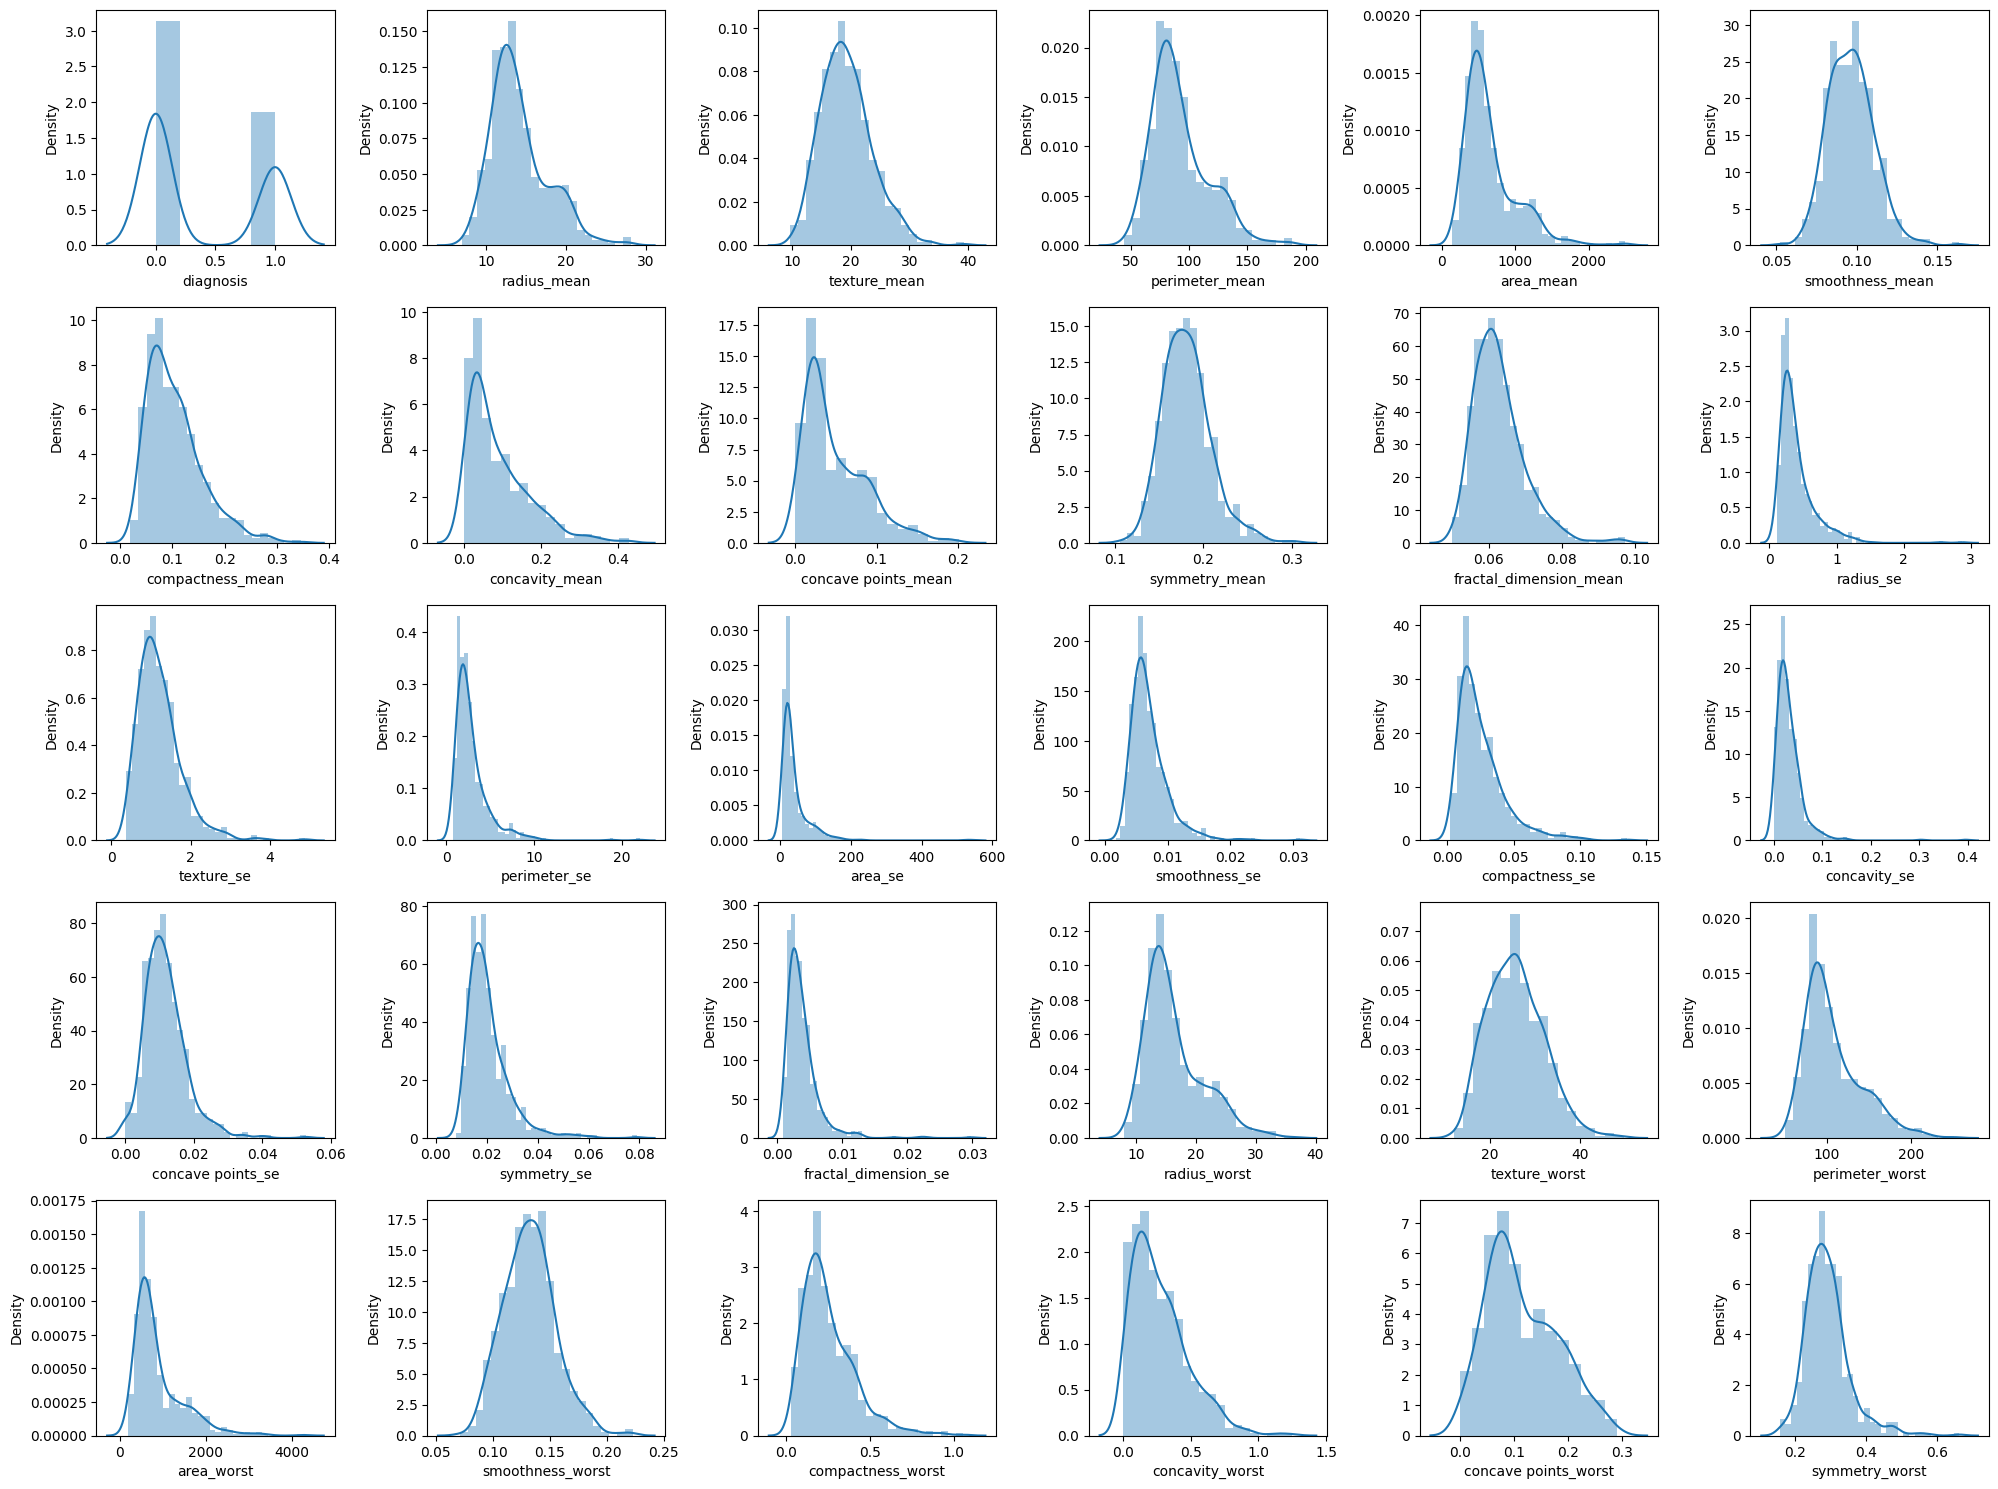

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

#Model building

diagnosis
0    357
1    212
Name: count, dtype: int64


<Axes: ylabel='count'>

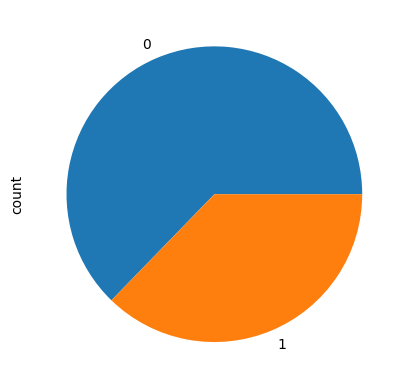

In [ ]:
print(df["diagnosis"].value_counts())

df["diagnosis"].value_counts().plot(kind="pie")

<Axes: >

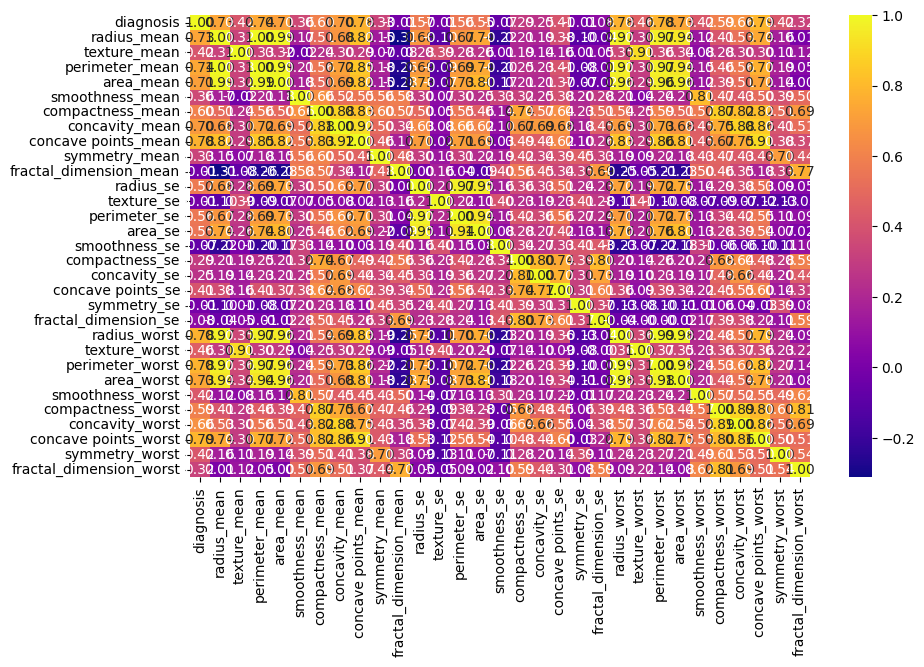

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

In [ ]:
# checking correlation of independent variable with dependent variable i.e diagnosis
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [ ]:
x=df.drop(["diagnosis"],axis=1)
y = df["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

# Returning the classification metrics for multi_class probelm.

def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))

def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))

shape of x : (569, 30) 
shape of y : (569, 1)


In [ ]:
def SVM_Model(x, y, testSize):

    global x_train , x_test , y_train , y_test , y_pred

    rows = []

    for n in testSize:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 0)

        # Create SVM model
        svc=SVC(kernel='linear')

        # fit SVM to training set
        svc.fit(x_train,y_train)

        # make predictions on test set
        y_pred=svc.predict(x_test)

        dataset = {'Test_size': n, 'acc': metrics.accuracy_score(y_test, y_pred), 'score': svc.score(x, y)}
        rows.append(dataset)
        evaluation3 = pd.DataFrame(rows)

    return (evaluation3)
# We want to hightlight the maximume values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]


In [ ]:
evaluation = SVM_Model(x, y, [0.1, 0.15, 0.2, 0.25, 0.3])
evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.964912,0.966608
1,0.150000,0.953488,0.964851
2,0.200000,0.956140,0.963093
3,0.250000,0.958042,0.964851
4,0.300000,0.959064,0.963093


In [ ]:
#split X and y in training and test set in 90:10 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (512, 30)
shape of y_train : (512, 1)
shape of x_test : (57, 30)
shape of y_test : (57, 1)


In [ ]:
# Create SVM model
svm=SVC(kernel='linear',random_state = 1)

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)

In [ ]:
Report(y_test , y_pred)

Accuracy : 96.49122807017544% 

Confusion Matrix : 

[[33  2]
 [ 0 22]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.92      1.00      0.96        22

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57

